## EXPLORATORY DATA ANALYSIS II

### Tasks:

#### 1. Data Exploration and Preprocessing:

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

•	Handle missing values as per the best practices (imputation, removal, etc.).

•	Apply scaling techniques to numerical features:

        -	Standard Scaling
        
        -	Min-Max Scaling

•	Discuss the scenarios where each scaling technique is preferred and why.

#### 2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

•	Use Label Encoding for categorical variables with more than 5 categories.

•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

#### 3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

#### 4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


#### *1. Data Exploration and Preprocessing*

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Statistical Summary
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(32561, 15)

In [6]:
# Checking for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
# Check for duplicates
if(df.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No. of duplicated rows: ", df.duplicated().sum())
else:
    print("NO DUPLICATES PRESENT")

# Print duplicated values
df[df.duplicated(keep = False)]

DUPLICATES ARE PRESENT
No. of duplicated rows:  24


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [8]:
# Remove Duplicates
df.drop_duplicates(inplace = True)
print("No. of duplicates", df.duplicated().sum())

No. of duplicates 0


In [9]:
# Selecting Numerical Columns
num_df = df.select_dtypes(include = ['int64'])
num_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


## ----- SCALING -----

In [10]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
num_col = num_df.columns
SS = StandardScaler()
df_SS = pd.DataFrame(SS.fit_transform(df[num_col]),
                               columns=[f"{col}_std" for col in num_col])

In [11]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df_MM = pd.DataFrame(MM.fit_transform(df[num_col]),
                     columns = [f"{col}_minmax" for col in num_col])

In [12]:
# Combine original with scaled versions
scaled_df = pd.concat([df[num_col], df_SS, df_MM], axis=1)
scaled_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_std,fnlwgt_std,education_num_std,capital_gain_std,capital_loss_std,hours_per_week_std,age_minmax,fnlwgt_minmax,education_num_minmax,capital_gain_minmax,capital_loss_minmax,hours_per_week_minmax
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,38.0,215646.0,9.0,0.0,0.0,40.0,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,53.0,234721.0,7.0,0.0,0.0,40.0,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,28.0,338409.0,13.0,0.0,0.0,40.0,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.150685,0.221488,0.800000,0.00000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28846,NaN,NaN,NaN,NaN,NaN,NaN,0.323693,-1.528398,1.134777,-0.145975,-0.216743,-0.278644,0.356164,0.010979,0.800000,0.00000,0.0,0.367347
29157,NaN,NaN,NaN,NaN,NaN,NaN,-0.996171,-0.075874,-0.031815,-0.145975,-0.216743,-0.035664,0.109589,0.115108,0.600000,0.00000,0.0,0.397959
30845,NaN,NaN,NaN,NaN,NaN,NaN,-0.482890,-0.437468,-1.587271,-0.145975,-0.216743,-0.278644,0.205479,0.089186,0.333333,0.00000,0.0,0.367347
31993,NaN,NaN,NaN,NaN,NaN,NaN,1.716882,-0.104371,-0.420679,-0.145975,-0.216743,-0.035664,0.616438,0.113065,0.533333,0.00000,0.0,0.397959


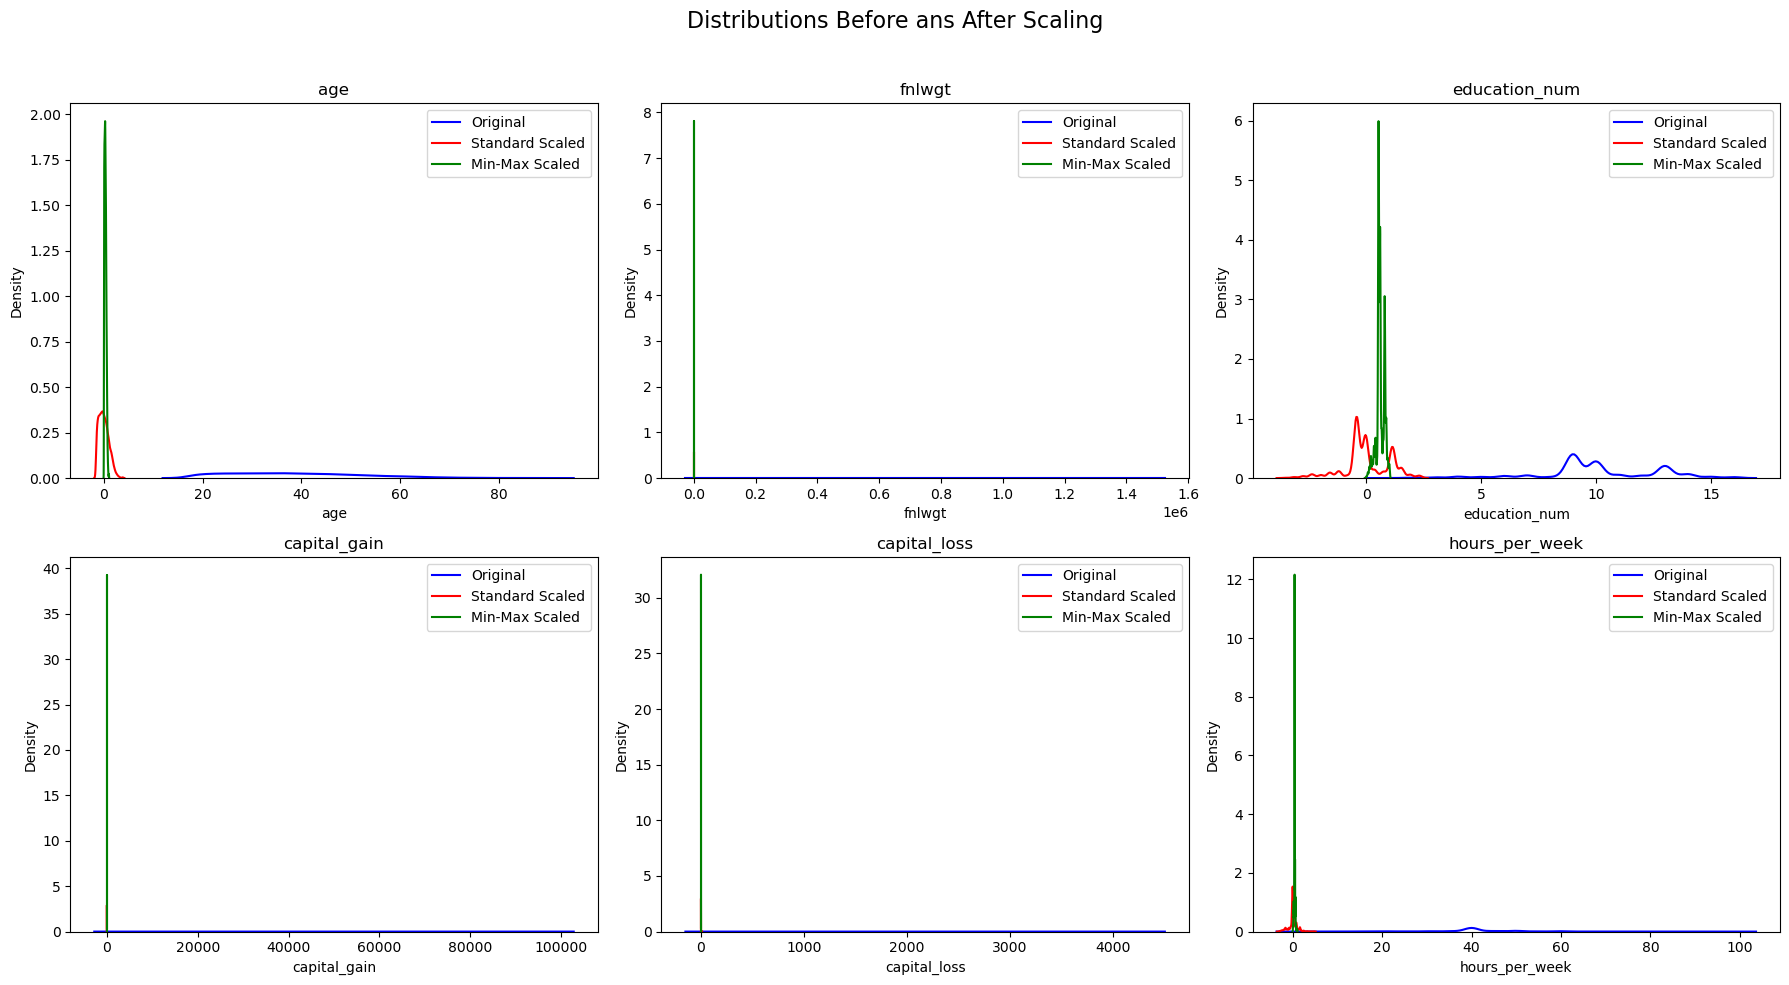

In [13]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize= (18,10))
fig.suptitle("Distributions Before ans After Scaling", fontsize = 16)

for i, col in enumerate(num_col):
    row, col_index = divmod(i,3)
    ax = axes[row][col_index]

    sns.kdeplot(df[col], ax = ax, label = "Original", color = 'blue')
    sns.kdeplot(df_SS[f"{col}_std"], ax = ax, label = "Standard Scaled", color = 'red')
    sns.kdeplot(df_MM[f"{col}_minmax"], ax =ax, label = "Min-Max Scaled", color = 'green')

    ax.set_title(col)
    ax.legend()

plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

#### 1. Standard Scaling (Z-score Normalization):

**Formula:**
𝑧 = (𝑥 − 𝜇) / 𝜎

**Use when:**

    * Data is normally distributed or near-normal.
    * Required by algorithms like Logistic Regression, SVM, K-Means, PCA, and Linear Regression.

#### 2. Min-Max Scaling:

**Formula:**
𝑥′ = (𝑥 − 𝑥𝑚𝑖𝑛) / (𝑥𝑚𝑎𝑥 − 𝑥𝑚𝑖𝑛)


**Use when:**

    * Features are not normally distributed.
    * Algorithms are distance-based like KNN, Neural Networks, or Gradient Descent-based models.

#### *2. Encoding Techniques:*

In [14]:
# Selecting Categorical Columns
cat_df = df.select_dtypes(include = ['object'])
cat_df

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [15]:
cat_col = cat_df.columns
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [16]:
# Split categorical columns by cardinality
low_cardinality = [col for col in cat_col if df[col].nunique() <= 5]
high_cardinality = [col for col in cat_col if df[col].nunique() > 5]

In [17]:
# Apply one-hot encoder to low cardinality features
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

# convert it to array - to columns
df_OHE = pd.DataFrame(OHE.fit_transform(df[low_cardinality]).toarray())
df_OHE

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32532,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32533,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32534,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32535,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [18]:
# Apply label encoding to high cardinality features
from sklearn.preprocessing import LabelEncoder
df_LE = df[high_cardinality].apply(LabelEncoder().fit_transform)
df_LE

,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5
...,...,...,...,...,...,...
32556,4,7,2,13,5,39
32557,4,11,2,7,0,39
32558,4,11,6,1,4,39
32559,4,11,4,1,3,39


In [19]:
# Combine encoded features
# Drop original categorical columns
df_encoded = df.drop(columns = cat_col)

# Concatenate encoded features
df_encoded = pd.concat([df_encoded, df_OHE, df_LE], axis = 1)
df_encoded

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,0,1,2,3,...,5,6,7,8,workclass,education,marital_status,occupation,relationship,native_country
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,7.0,9.0,4.0,1.0,1.0,39.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,9.0,2.0,4.0,0.0,39.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4.0,11.0,0.0,6.0,1.0,39.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,4.0,1.0,2.0,6.0,0.0,39.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,4.0,9.0,2.0,10.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28846,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
29157,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
30845,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
31993,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Pros and Cons of Encoding Techniques

***One-Hot Encoding***

| Pros                                                      | Cons                                          |
| --------------------------------------------------------- | --------------------------------------------- |
| No ordinal relationship is assumed                        | Can create many columns (high dimensionality) |
| Easy to interpret                                         | Not suitable for high-cardinality features    |
| Good for tree-based models (e.g., Random Forest, XGBoost) | Sparse matrix may affect performance          |




***Label Encoding***

| Pros                                 | Cons                                                                           |
| ------------------------------------ | ------------------------------------------------------------------------------ |
| Memory-efficient (just one column)   | Implicit order may mislead models                                              |
| Useful for ordinal data              | Misinterpreted by distance-based models (KNN, SVM) if categories are unordered |
| Better for high-cardinality features | Can introduce model bias if ordering is not meaningful                         |


#### *3. Feature Engineering:*

In [20]:
# Creat Work Intensity feature
df['work_intensity'] = pd.cut(df['hours_per_week'],
                              bins = [0, 20, 40, 60, 100],
                              labels = ['Part-time', 'Full-time', 'Over-time', 'Extreme'])

df['age_group'] = pd.cut(df['age'],
                        bins = [16, 25, 45, 65, 90],
                        labels = ['Youth', 'Adult', 'Senoir', 'Elder'])

**Feature 1: Work Intensity Category**

People who work more hours might earn more, but this relationship is not linear. Categorizing helps models understand patterns like part-time or overtime jobs.


**Feature 2: Age Group**

Categorizing age simplifies patterns in income, especially for classification models. Age groups often correlate better with career phase than raw age values.

In [21]:
# Check skewness in 'capital_gain'
for col in num_col:
    skew_val = df[col].skew()
    if abs(skew_val) > 1:
        print(f"{col} has high skewness: {skew_val: .2f}")

fnlwgt has high skewness:  1.45
capital_gain has high skewness:  11.95
capital_loss has high skewness:  4.59


In [22]:
# Log transform capital-gain (add 1 to avoid log(0))
df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: log_capital_gain, Length: 32537, dtype: float64

- 'capital-gain' has a long tail of high values and many zeros.

- Log transformation compresses extreme values and makes the distribution more normal, helping algorithms that assume normality (e.g., linear models, SVM).

In [23]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,work_intensity,age_group,log_capital_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Full-time,Adult,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Part-time,Senoir,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-time,Adult,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Full-time,Senoir,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Full-time,Adult,0.000000


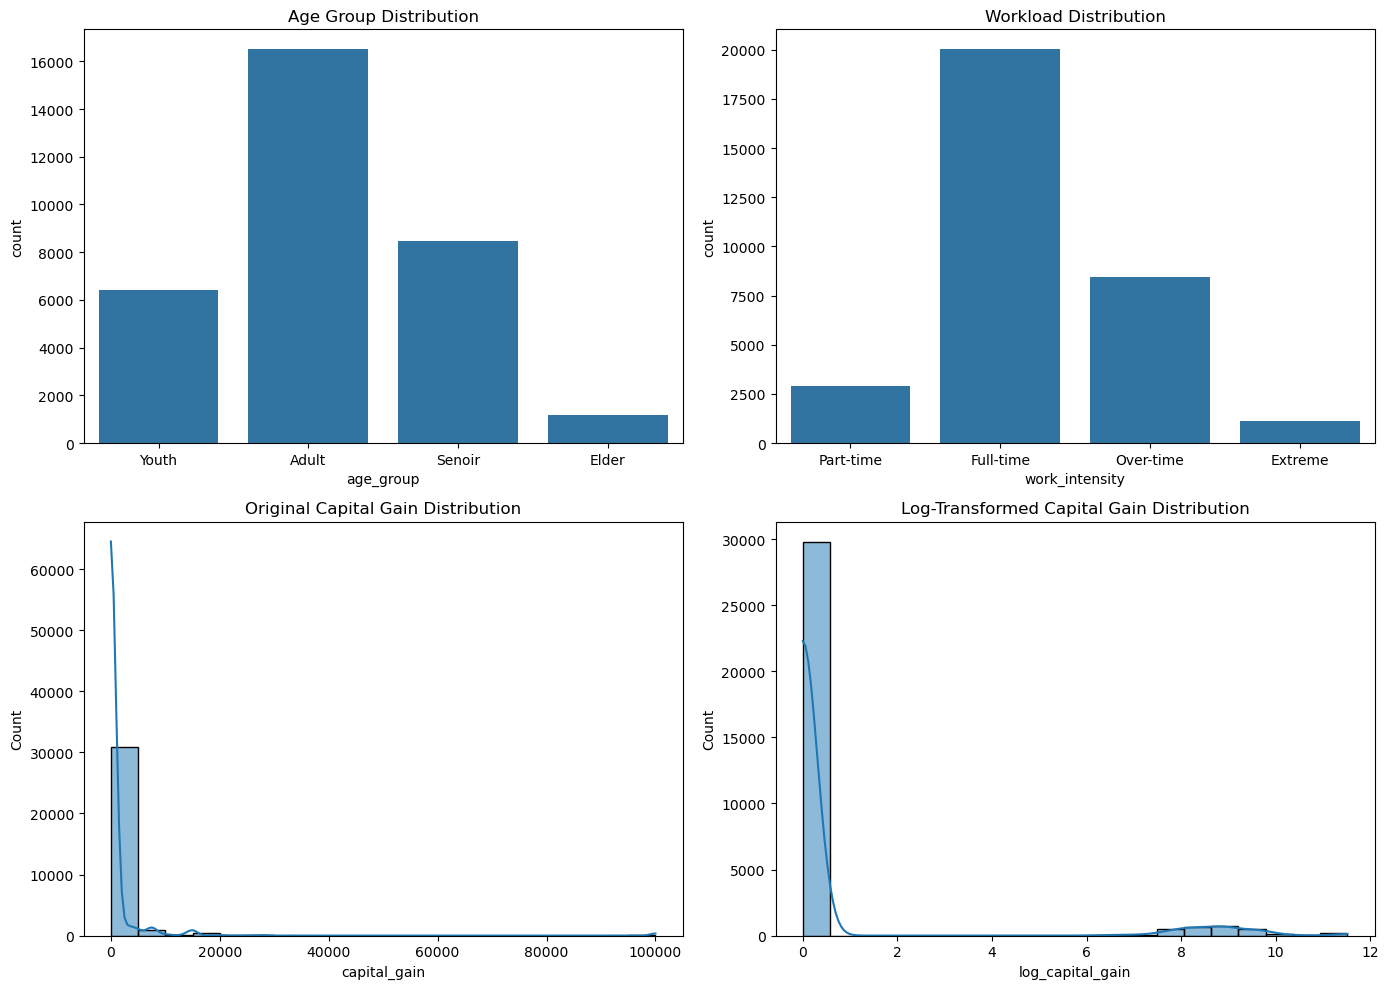

In [24]:
# Visualizing
fig, axes = plt.subplots(2,2, figsize = (14, 10))

# Countplot - Age
sns.countplot(data = df, x = 'age_group', ax = axes[0,0])
axes[0,0].set_title('Age Group Distribution')

# Workload countplot
sns.countplot(data = df, x = 'work_intensity', ax = axes[0, 1])
axes[0, 1].set_title('Workload Distribution')

# Original capital-gain histogram
sns.histplot(df['capital_gain'], bins = 20, kde = True, ax = axes[1, 0])
axes[1, 0].set_title('Original Capital Gain Distribution')

# Log-transformed capital-gain histogram
sns.histplot(df['log_capital_gain'], bins = 20, kde = True, ax = axes[1, 1])
axes[1, 1].set_title('Log-Transformed Capital Gain Distribution')

plt.tight_layout()
plt.show()

#### *4. Feature Selection:*

In [25]:
# Using Isolation Forest
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(contamination = 0.01, random_state = 42)
outliers = iso.fit_predict(df[num_col])

# Add result to dataframe
df['outlier'] = outliers
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,work_intensity,age_group,log_capital_gain,outlier
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Full-time,Adult,7.684784,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Part-time,Senoir,0.000000,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-time,Adult,0.000000,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Full-time,Senoir,0.000000,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Full-time,Adult,0.000000,1


In [26]:
# Keep only inliers
df_cleaned = df[df['outlier'] == 1].drop(columns = ['outlier'])
df_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,work_intensity,age_group,log_capital_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Full-time,Adult,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Part-time,Senoir,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-time,Adult,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Full-time,Senoir,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Full-time,Adult,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Full-time,Adult,0.000000
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Full-time,Adult,0.000000
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Full-time,Senoir,0.000000
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Part-time,Youth,0.000000


In [27]:
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Original shape: (32537, 19)
Shape after removing outliers: (32211, 18)


#### Using Predictive Power Score

In [28]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 86.8 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=351f499b707d2476be4c25e5d7bd193911fdb2bf94505a150becc8d71f5f1934
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatibl

In [2]:
!pip uninstall ppscore pandas numpy -y

Found existing installation: ppscore 1.3.0
Uninstalling ppscore-1.3.0:
  Successfully uninstalled ppscore-1.3.0
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [4]:
!pip install numpy==1.23.5 pandas==1.5.3

  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.4 MB/s eta 0:00:00
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 

In [2]:
!pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl


In [3]:
import ppscore as pps

In [33]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(df_cleaned)
pps_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.016427,classification,True,weighted F1,0.576994,0.583943,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,76284.165200,77724.872095,DecisionTreeRegressor()
3,age,education,0.054155,classification,True,weighted F1,0.187000,0.231028,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.865600,1.893476,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
319,log_capital_gain,native_country,0.000000,classification,True,weighted F1,0.847141,0.846421,DecisionTreeClassifier()
320,log_capital_gain,income,0.288237,classification,True,weighted F1,0.663688,0.760625,DecisionTreeClassifier()
321,log_capital_gain,work_intensity,0.031834,classification,True,weighted F1,0.480272,0.496817,DecisionTreeClassifier()
322,log_capital_gain,age_group,0.019917,classification,True,weighted F1,0.369800,0.382352,DecisionTreeClassifier()


In [34]:
# Display the top predictive relationships
top_pps = pps_matrix.sort_values("ppscore", ascending=False).head(10)
print(top_pps[['x', 'y', 'ppscore']])

                  x               y  ppscore
0               age             age      1.0
171             sex             sex      1.0
58        education   education_num      1.0
75    education_num       education      1.0
76    education_num   education_num      1.0
95   marital_status  marital_status      1.0
114      occupation      occupation      1.0
133    relationship    relationship      1.0
152            race            race      1.0
190    capital_gain    capital_gain      1.0


In [35]:
# Pearson Correlation Matrix
corr_matrix = df_cleaned.corr(numeric_only=True)
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,log_capital_gain
age,1.000000,-0.077185,0.029816,0.111064,0.033653,0.069247,0.113590
fnlwgt,-0.077185,1.000000,-0.045326,-0.009187,-0.016251,-0.021838,-0.006810
education_num,0.029816,-0.045326,1.000000,0.145716,0.080835,0.144755,0.109281
capital_gain,0.111064,-0.009187,0.145716,1.000000,-0.048509,0.087522,0.843831
capital_loss,0.033653,-0.016251,0.080835,-0.048509,1.000000,0.042613,-0.060577
hours_per_week,0.069247,-0.021838,0.144755,0.087522,0.042613,1.000000,0.072766
log_capital_gain,0.113590,-0.006810,0.109281,0.843831,-0.060577,0.072766,1.000000


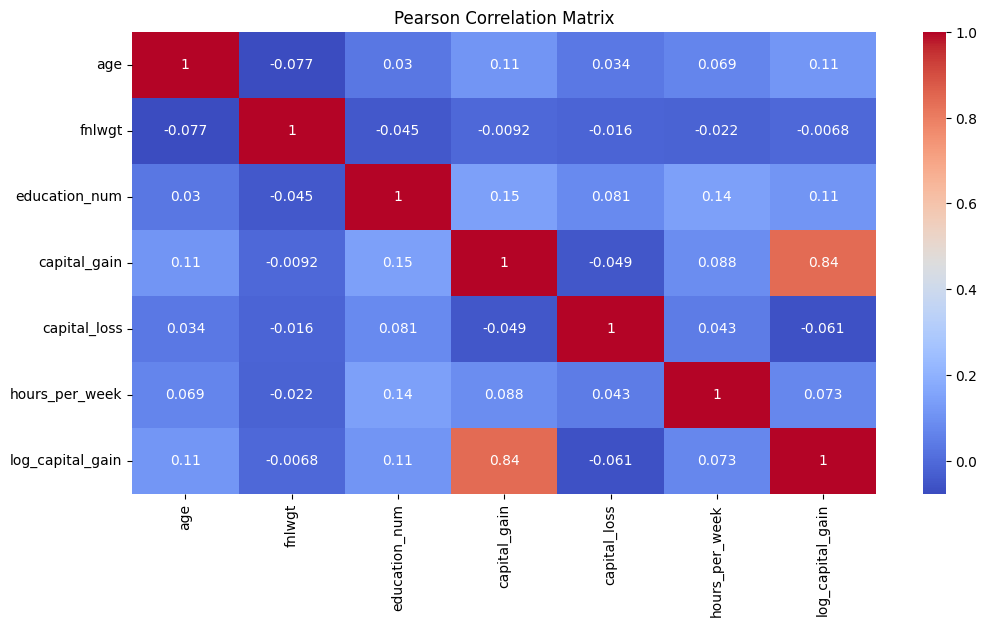

                  x   ppscore
0      capital_gain  0.288237
1  log_capital_gain  0.288237
2         education  0.177686
3     education_num  0.177686
4      capital_loss  0.131055
5         workclass  0.056147
6      relationship  0.044981
7               age  0.039801
8    native_country  0.006336
9    hours_per_week  0.001258


In [36]:
# Plot heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Matrix")
plt.show()

# PPS heatmap
pps_df = pps.predictors(df_cleaned, y='income')  # Replace 'income' with your actual target
pps_df = pps_df.sort_values(by='ppscore', ascending=False)

print(pps_df[['x', 'ppscore']].head(10))
